In [1]:
import torch
import matplotlib.pyplot as plt
from useful_functions_notebook_14to18 import *
from useful_functions_notebook_8to13 import variable_consistancy_check, mass_not_preserved_percentage_decrease, check_branch_length, analyze_data
from IPython.display import display, HTML
from IPython.display import display
display(HTML("<style>.container { width:70% !important; }</style>"))


# Cosine noise scheduler test


# Bilinear
## diffusion model trained with bilinear interpolation, epochs = 200, T = 1000 and cosinge scheduler

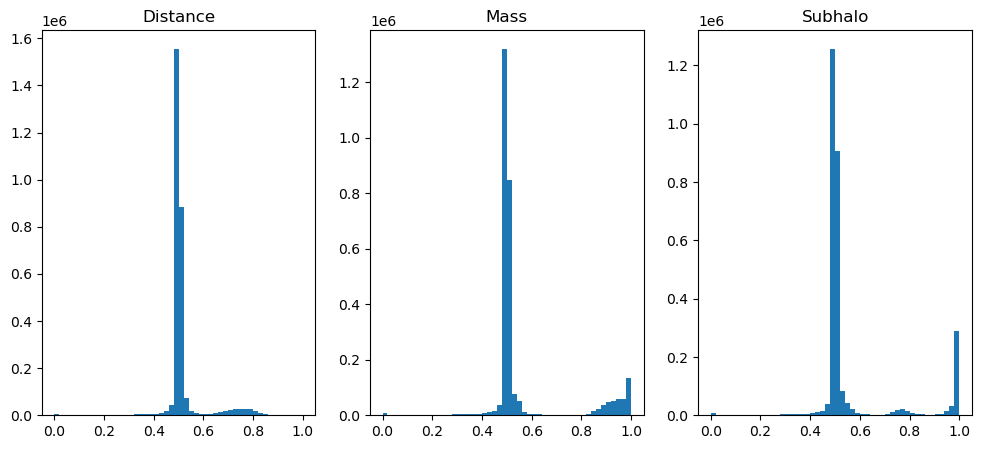

In [25]:
original = torch.load('data/dataset_distlognorm_massnorm.pt')
transform = transforms.Resize((29, 10))

cosine = torch.load("../testing/scheduler/generated_image_BILINEAR_T=1000_cosine.pt", map_location = "cpu")
cosine = transform(cosine.to(dtype=torch.float))
cosine = normalize(cosine, True, [0, 1, 2])


dist = cosine[:, 0]
mass = cosine[:, 1]
subh = cosine[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()


In [29]:
# dist
print("dist:")
lower_threshold = 0.6
upper_threshold = 0.61
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.65
upper_threshold = 0.8
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.65
upper_threshold = 0.7
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.85
upper_threshold = 0.9
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.6 and 0.61: 0.11%

mass:
Percentage of values between 0.65 and 0.8: 0.40%

subh:
Percentage of values between 0.65 and 0.7: 0.20%

Percentage of values between 0.85 and 0.9: 0.23%



In [30]:
cosine = transform_diffusion_image(cosine, d_thresh = 0.6, m_tresh = 0.8, s_low = 0.7, s_high = 0.9)

cosine_con, cosine_incon = check_consistency(cosine)



Percentage of consistant images = 81.99%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 58.75%
inconsistency due to distance not zero in main branch =  30.71%
inconsistency due to gap between branches =  74.46%
inconsistency due to zgap in branch 45.53%
inconsistency due to last descendant dont exist 20.38%

Number of images with two or more inconsistencies = 938, which is  52.08%
That corresponds to 9.38% of all images


Of all images, 10.58% have zero inconsistency
Of all images, 5.53% have distance main branch inconsistency
Of all images, 13.41% have gap between branches inconsistency
Of all images, 8.20% have gap within branch inconsistency
Of all images, 3.67% have last descendant inconsistency


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 107217
perc of occurences where mass is not preserved = 29.52% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 37977
perc of occurences where mass is not preserved = 10.45% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 7103
perc of occurences where mass is not preserved = 1.96% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 31
perc of occurences where mass is not preserved = 0.01% vs. 0.32% in training data







DISTANCE:
total distance progentors = 166135 
number of occurences where distance increase (not preserved) = 77663
perc of occurences where mass increase (not preserved) = 46.75% vs. 49.67% in training data


total branches where the last halo distance to main b

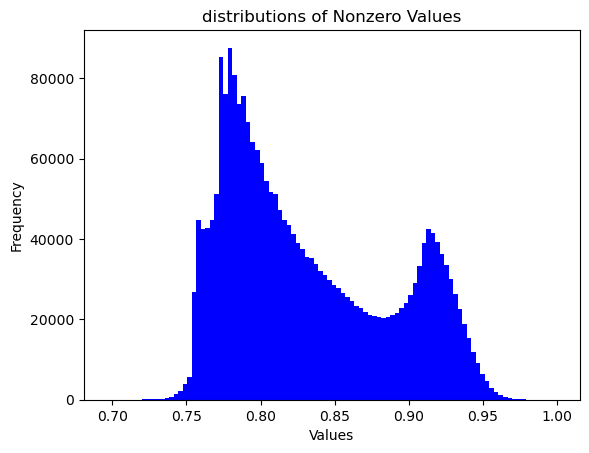

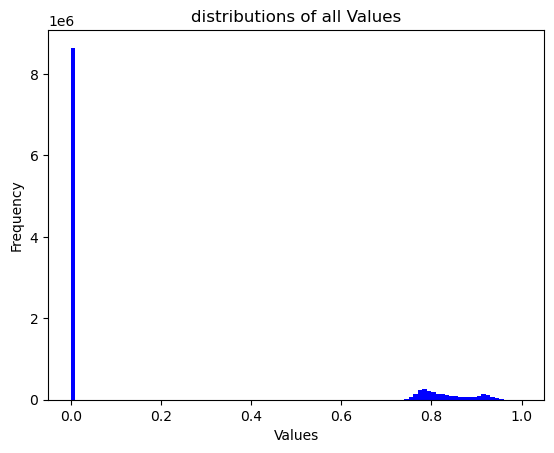

number of nonzero values = 2475374
Generated images:


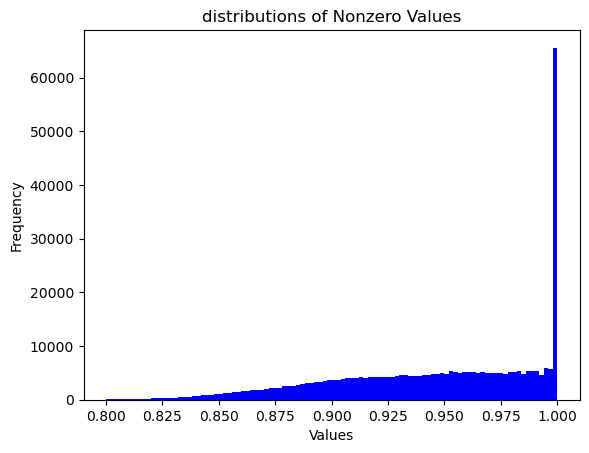

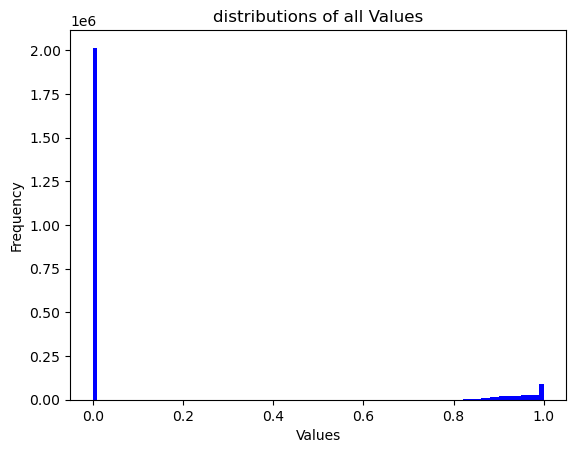

number of nonzero values = 364091


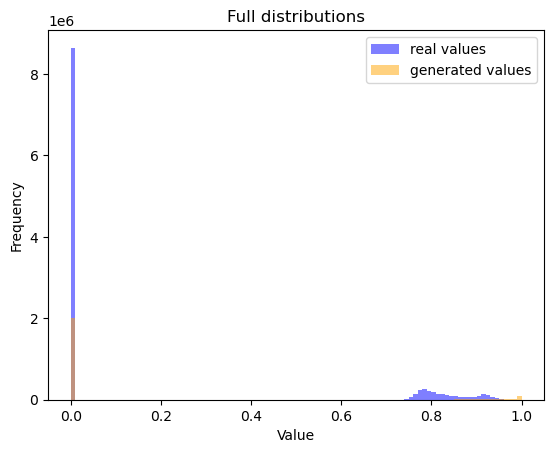

Full distribution:
KS Statistic: 0.08813154244688559
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0010:
The distributions are significantly different (reject H0), KS statistic 0.0881 > 0.0010


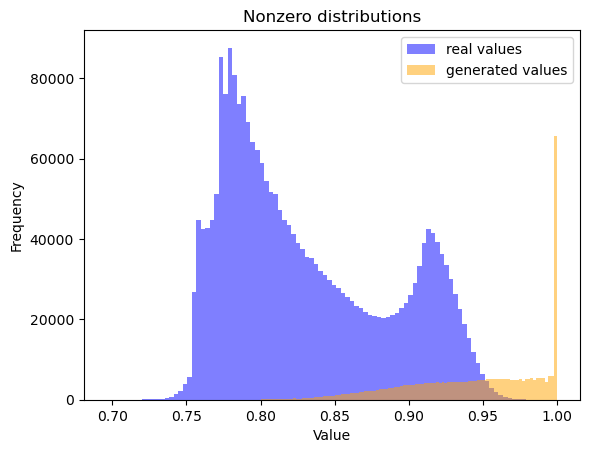

Nonzero distribution:
KS Statistic: 0.6561872585063844
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0024:
The distributions are significantly different (reject H0), KS statistic 0.6562 > 0.0024


(0.08813154244688559, 0.6561872585063844)

In [31]:
variable_consistancy_check(cosine_con, False)
avg_branch = check_branch_length(cosine_con)
ks_test(original, cosine_con, dim = 1)

# solving shift and compression in generated dat

In [3]:
cosine = torch.load("../testing/generated_image_BILINEAR_T=1000_cosine.pt", map_location = "cpu")
interpolation = transforms.InterpolationMode.BILINEAR
transform = transforms.Resize((29, 10), interpolation = interpolation)
cosine = transform(cosine.to(dtype=torch.float))

In [4]:

# Assuming you have a tensor named 'tensor'
# Convert tensor to 1D if it's not already
tensor_1d = cosine.view(-1)

# Get unique values and their counts
unique_values, counts = torch.unique(torch.round(tensor_1d, decimals = 0), return_counts=True)

# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")




Value: 0.0, Count: 14042
Value: 1.0, Count: 1585
Value: 2.0, Count: 1463
Value: 3.0, Count: 1329
Value: 4.0, Count: 1560
Value: 5.0, Count: 1015
Value: 6.0, Count: 1088
Value: 7.0, Count: 1432
Value: 8.0, Count: 1105
Value: 9.0, Count: 1301
Value: 10.0, Count: 1018
Value: 11.0, Count: 1197
Value: 12.0, Count: 1278
Value: 13.0, Count: 1189
Value: 14.0, Count: 1034
Value: 15.0, Count: 1554
Value: 16.0, Count: 1005
Value: 17.0, Count: 1142
Value: 18.0, Count: 1033
Value: 19.0, Count: 1013
Value: 20.0, Count: 1438
Value: 21.0, Count: 1040
Value: 22.0, Count: 1600
Value: 23.0, Count: 1095
Value: 24.0, Count: 1269
Value: 25.0, Count: 1526
Value: 26.0, Count: 1561
Value: 27.0, Count: 885
Value: 28.0, Count: 1286
Value: 29.0, Count: 1115
Value: 30.0, Count: 986
Value: 31.0, Count: 1010
Value: 32.0, Count: 826
Value: 33.0, Count: 1068
Value: 34.0, Count: 1030
Value: 35.0, Count: 818
Value: 36.0, Count: 1253
Value: 37.0, Count: 1111
Value: 38.0, Count: 1026
Value: 39.0, Count: 854
Value: 40.0, C

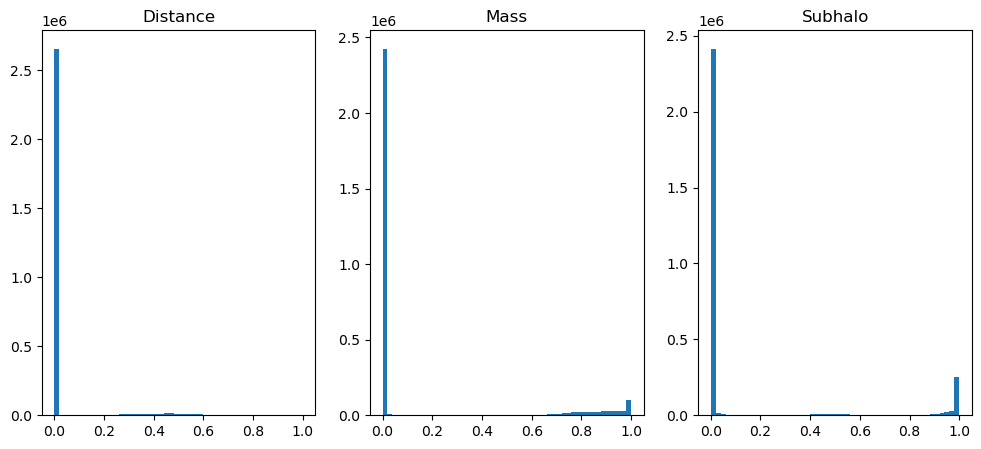

In [5]:
threshold = 140
cosine[cosine < threshold] = threshold

cosine = normalize(cosine, True, [0, 1, 2])

dist = cosine[:, 0]
mass = cosine[:, 1]
subh = cosine[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()


In [6]:
# dist
print("dist:")
lower_threshold = 0.2
upper_threshold = 0.3
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.2
upper_threshold = 0.6
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.2
upper_threshold = 0.4
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.6
upper_threshold = 0.8
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.2 and 0.3: 0.86%

mass:
Percentage of values between 0.2 and 0.6: 0.54%

subh:
Percentage of values between 0.2 and 0.4: 0.53%

Percentage of values between 0.6 and 0.8: 0.53%



In [19]:
cosine = transform_diffusion_image(cosine, d_thresh = 0.25, m_tresh = 0.6, s_low = 0.3, s_high = 0.77)

cosine_con, cosine_incon = check_consistency(cosine)



Percentage of consistant images = 51.95%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 11.93%
inconsistency due to distance not zero in main branch =  8.87%
inconsistency due to gap between branches =  91.24%
inconsistency due to zgap in branch 22.06%
inconsistency due to last descendant dont exist 7.87%

Number of images with two or more inconsistencies = 809, which is  16.84%
That corresponds to 8.09% of all images


Of all images, 5.73% have zero inconsistency
Of all images, 4.26% have distance main branch inconsistency
Of all images, 43.84% have gap between branches inconsistency
Of all images, 10.60% have gap within branch inconsistency
Of all images, 3.78% have last descendant inconsistency


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 65859
perc of occurences where mass is not preserved = 28.75% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 40963
perc of occurences where mass is not preserved = 17.88% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 14234
perc of occurences where mass is not preserved = 6.21% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 7277
perc of occurences where mass is not preserved = 3.18% vs. 0.32% in training data







DISTANCE:
total distance progentors = 102867 
number of occurences where distance increase (not preserved) = 47391
perc of occurences where mass increase (not preserved) = 46.07% vs. 49.67% in training data


total branches where the last halo distance to main

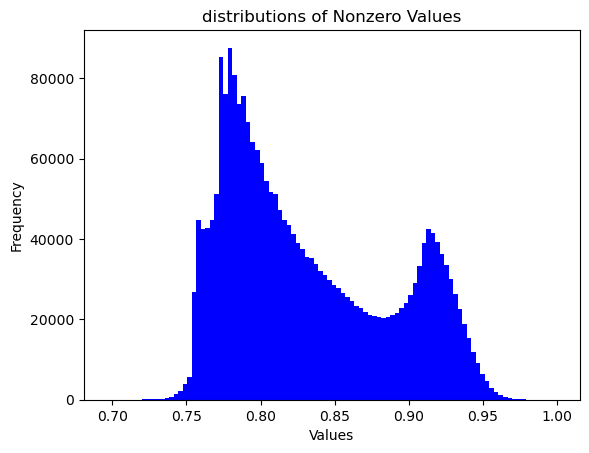

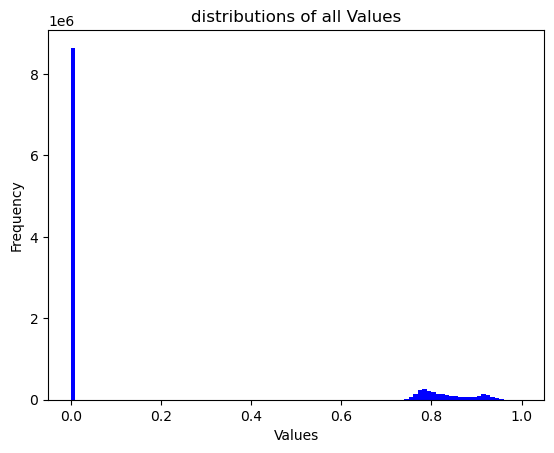

number of nonzero values = 2475374
Generated images:


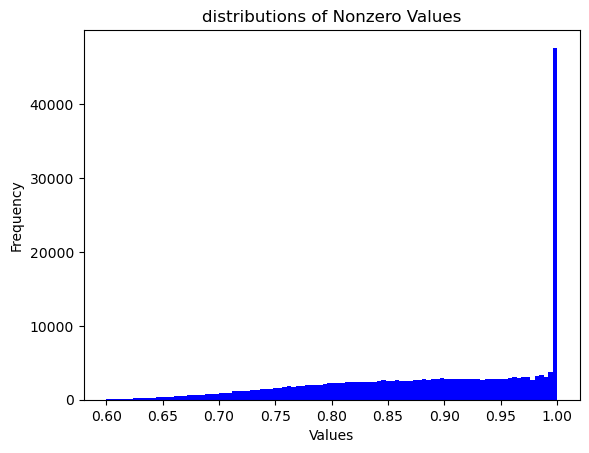

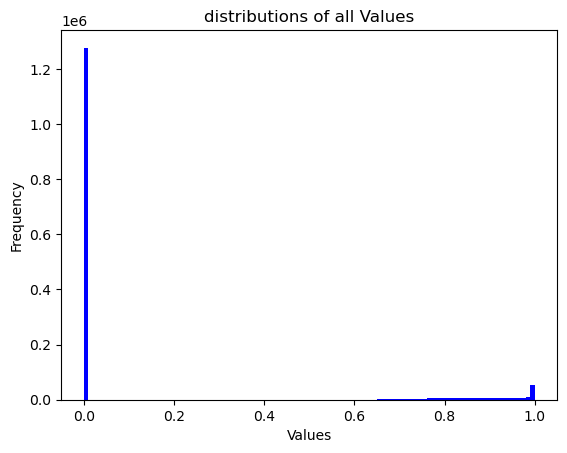

number of nonzero values = 229357


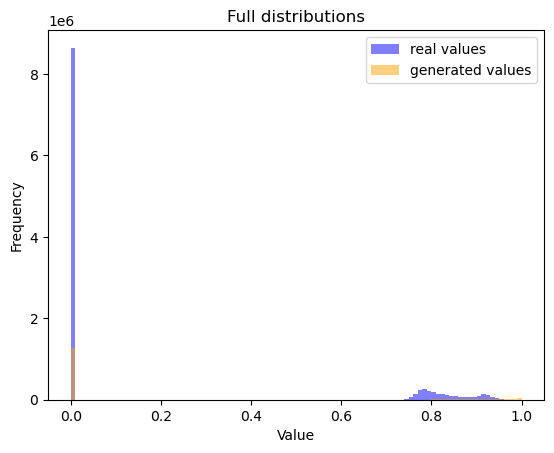

Full distribution:
KS Statistic: 0.0865227451373396
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0012:
The distributions are significantly different (reject H0), KS statistic 0.0865 > 0.0012


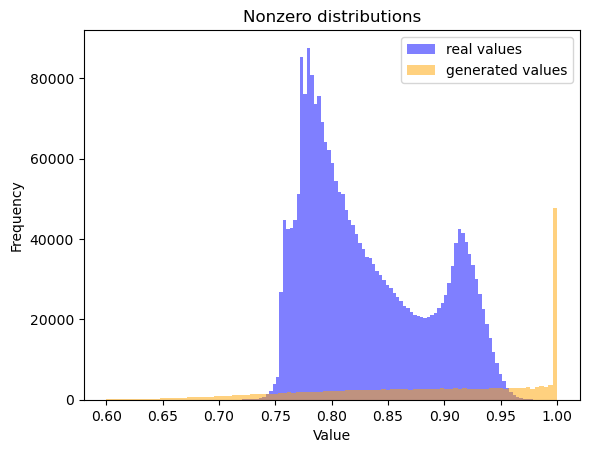

Nonzero distribution:
KS Statistic: 0.37410143919848726
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0030:
The distributions are significantly different (reject H0), KS statistic 0.3741 > 0.0030


(0.0865227451373396, 0.37410143919848726)

In [24]:
variable_consistancy_check(cosine_con, False)
avg_branch = check_branch_length(cosine_con)
ks_test(original, cosine_con, dim = 1)

# Bicubic
## diffusion model trained with bicubic interpolation, epochs = 200, T = 1000 and cosinge scheduler

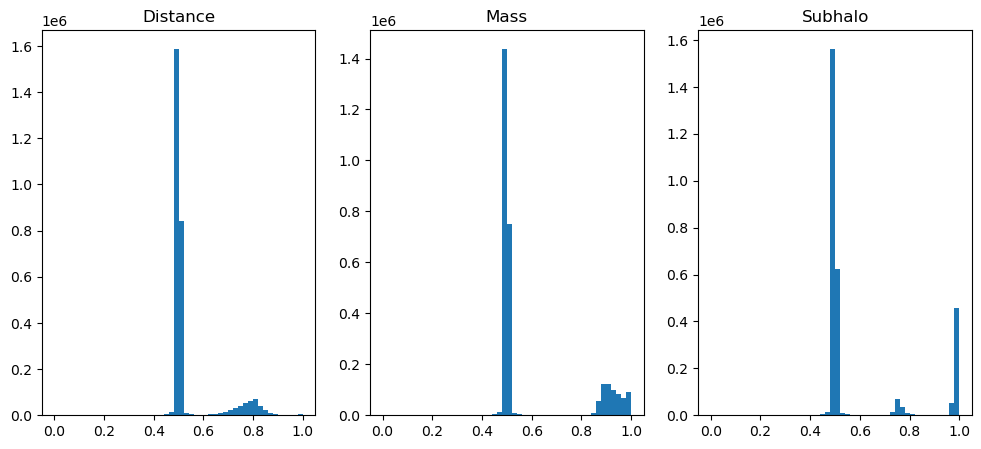

In [37]:
original = torch.load('data/dataset_distlognorm_massnorm.pt')
transform = transforms.Resize((29, 10))

cosine = torch.load("../testing/scheduler/generated_image_BICUBIC_T=1000_cosine.pt", map_location = "cpu")
cosine = transform(cosine.to(dtype=torch.float))
cosine = normalize(cosine, True, [0, 1, 2])


dist = cosine[:, 0]
mass = cosine[:, 1]
subh = cosine[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()


In [43]:
# dist
print("dist:")
lower_threshold = 0.59
upper_threshold = 0.61
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.65
upper_threshold = 0.8
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.65
upper_threshold = 0.7
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.9
upper_threshold = 0.95
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.59 and 0.61: 0.08%

mass:
Percentage of values between 0.65 and 0.8: 0.15%

subh:
Percentage of values between 0.65 and 0.7: 0.06%

Percentage of values between 0.9 and 0.95: 0.08%



In [44]:
cosine = transform_diffusion_image(cosine, d_thresh = 0.6, m_tresh = 0.8, s_low = 0.7, s_high = 0.92)

cosine_con, cosine_incon = check_consistency(cosine)



Percentage of consistant images = 92.03%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 28.86%
inconsistency due to distance not zero in main branch =  22.46%
inconsistency due to gap between branches =  60.73%
inconsistency due to zgap in branch 48.68%
inconsistency due to last descendant dont exist 12.67%

Number of images with two or more inconsistencies = 243, which is  30.49%
That corresponds to 2.43% of all images


Of all images, 2.30% have zero inconsistency
Of all images, 1.79% have distance main branch inconsistency
Of all images, 4.84% have gap between branches inconsistency
Of all images, 3.88% have gap within branch inconsistency
Of all images, 1.01% have last descendant inconsistency


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 171512
perc of occurences where mass is not preserved = 29.27% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 58610
perc of occurences where mass is not preserved = 10.00% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 1421
perc of occurences where mass is not preserved = 0.24% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 7
perc of occurences where mass is not preserved = 0.00% vs. 0.32% in training data







DISTANCE:
total distance progentors = 370934 
number of occurences where distance increase (not preserved) = 170602
perc of occurences where mass increase (not preserved) = 45.99% vs. 49.67% in training data


total branches where the last halo distance to main b

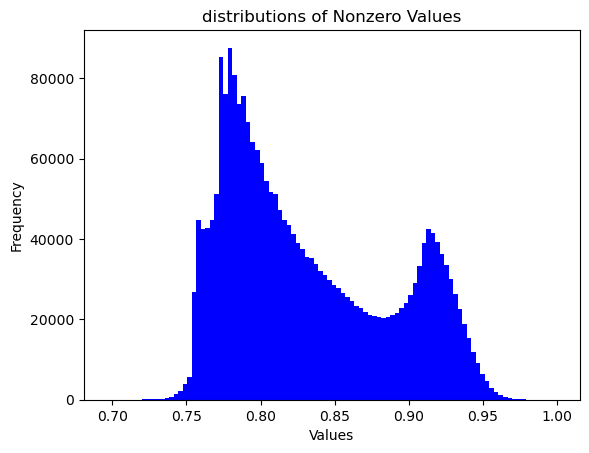

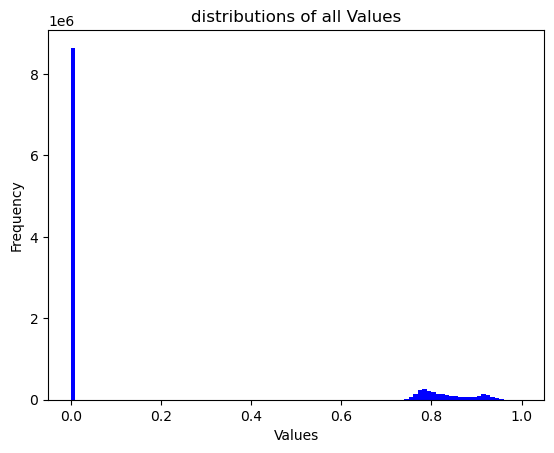

number of nonzero values = 2475374
Generated images:


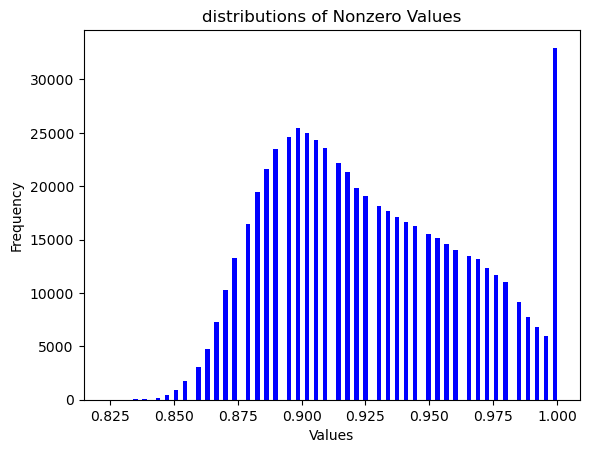

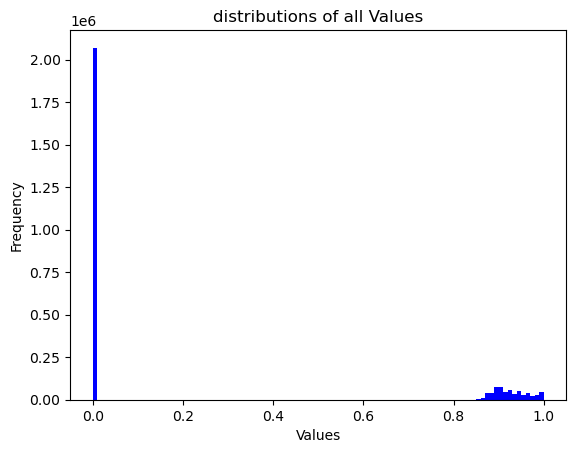

number of nonzero values = 597994


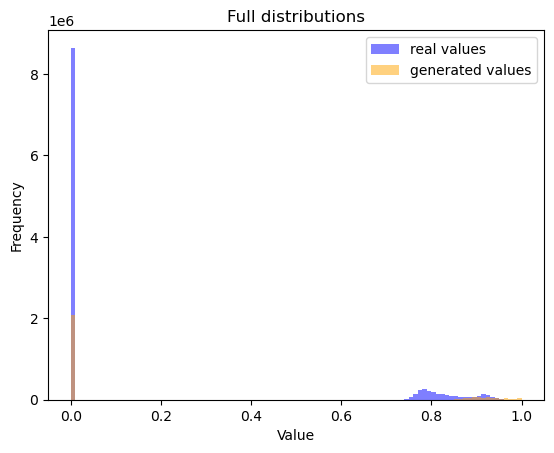

Full distribution:
KS Statistic: 0.1562823036596085
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0009:
The distributions are significantly different (reject H0), KS statistic 0.1563 > 0.0009


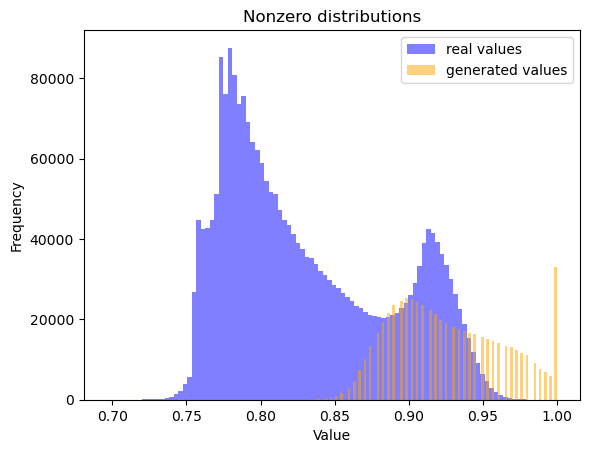

Nonzero distribution:
KS Statistic: 0.6956121553391402
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0020:
The distributions are significantly different (reject H0), KS statistic 0.6956 > 0.0020


(0.1562823036596085, 0.6956121553391402)

In [45]:
variable_consistancy_check(cosine_con, False)
avg_branch = check_branch_length(cosine_con)
ks_test(original, cosine_con, dim = 1)

In [49]:
cosine = torch.load("../testing/scheduler/generated_image_BICUBIC_T=1000_cosine.pt", map_location = "cpu")
interpolation = transforms.InterpolationMode.BILINEAR
transform = transforms.Resize((29, 10), interpolation = interpolation)
cosine = transform(cosine.to(dtype=torch.float))
# Assuming you have a tensor named 'tensor'
# Convert tensor to 1D if it's not already
tensor_1d = cosine.view(-1)

# Get unique values and their counts
unique_values, counts = torch.unique(torch.round(tensor_1d, decimals = 0), return_counts=True)

# Print unique values and their counts
for value, count in zip(unique_values, counts):
    print(f"Value: {value}, Count: {count}")




Value: 0.0, Count: 4200
Value: 1.0, Count: 178
Value: 2.0, Count: 151
Value: 3.0, Count: 141
Value: 4.0, Count: 131
Value: 5.0, Count: 147
Value: 6.0, Count: 163
Value: 7.0, Count: 163
Value: 8.0, Count: 159
Value: 9.0, Count: 193
Value: 10.0, Count: 163
Value: 11.0, Count: 158
Value: 12.0, Count: 140
Value: 13.0, Count: 148
Value: 14.0, Count: 159
Value: 15.0, Count: 163
Value: 16.0, Count: 164
Value: 17.0, Count: 153
Value: 18.0, Count: 176
Value: 19.0, Count: 135
Value: 20.0, Count: 141
Value: 21.0, Count: 169
Value: 22.0, Count: 167
Value: 23.0, Count: 164
Value: 24.0, Count: 155
Value: 25.0, Count: 149
Value: 26.0, Count: 166
Value: 27.0, Count: 147
Value: 28.0, Count: 173
Value: 29.0, Count: 179
Value: 30.0, Count: 154
Value: 31.0, Count: 208
Value: 32.0, Count: 160
Value: 33.0, Count: 168
Value: 34.0, Count: 190
Value: 35.0, Count: 178
Value: 36.0, Count: 185
Value: 37.0, Count: 174
Value: 38.0, Count: 196
Value: 39.0, Count: 187
Value: 40.0, Count: 180
Value: 41.0, Count: 188
V

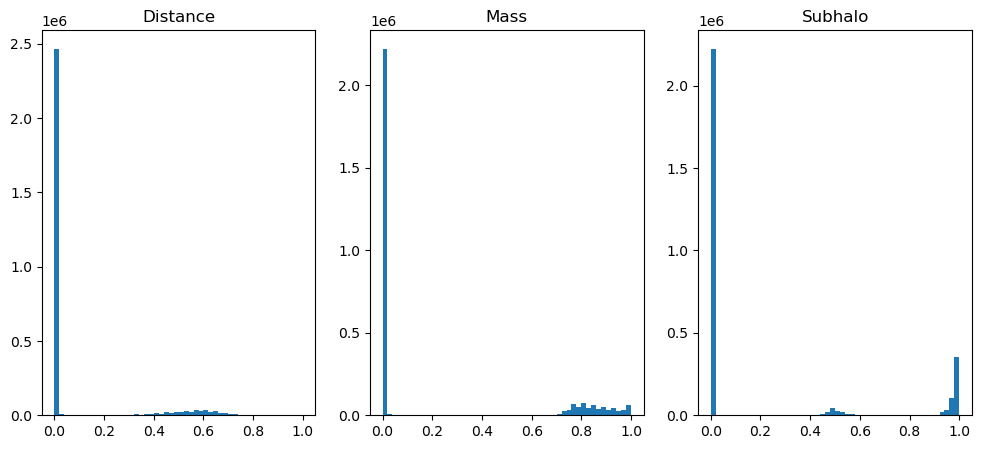

In [50]:
threshold = 130
cosine[cosine < threshold] = threshold

cosine = normalize(cosine, True, [0, 1, 2])

dist = cosine[:, 0]
mass = cosine[:, 1]
subh = cosine[:, 2]

fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# Display the first image in the first subplot
axs[0].hist(dist.numpy().flatten(), bins = 50)
axs[0].set_title('Distance')

# Display the second image in the second subplot
axs[1].hist(mass.numpy().flatten(), bins = 50)
axs[1].set_title('Mass')

# Display the second image in the second subplot
axs[2].hist(subh.numpy().flatten(), bins = 50)
axs[2].set_title('Subhalo')

plt.show()


In [51]:
# dist
print("dist:")
lower_threshold = 0.2
upper_threshold = 0.3
count_between_thresholds = torch.sum((dist > lower_threshold) & (dist < upper_threshold)).item()
total_elements = dist.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("mass:")
lower_threshold = 0.2
upper_threshold = 0.6
count_between_thresholds = torch.sum((mass > lower_threshold) & (mass < upper_threshold)).item()
total_elements = mass.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")

print("subh:")
lower_threshold = 0.2
upper_threshold = 0.4
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")
lower_threshold = 0.6
upper_threshold = 0.8
count_between_thresholds = torch.sum((subh > lower_threshold) & (subh < upper_threshold)).item()
total_elements = subh.numel()
percentage_between_thresholds = (count_between_thresholds / total_elements) * 100
print(f"Percentage of values between {lower_threshold} and {upper_threshold}: {percentage_between_thresholds:.2f}%\n")


dist:
Percentage of values between 0.2 and 0.3: 0.37%

mass:
Percentage of values between 0.2 and 0.6: 0.23%

subh:
Percentage of values between 0.2 and 0.4: 0.14%

Percentage of values between 0.6 and 0.8: 0.27%



In [52]:
cosine = transform_diffusion_image(cosine, d_thresh = 0.25, m_tresh = 0.6, s_low = 0.3, s_high = 0.77)

cosine_con, cosine_incon = check_consistency(cosine)



Percentage of consistant images = 84.02%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 11.95%
inconsistency due to distance not zero in main branch =  9.76%
inconsistency due to gap between branches =  60.08%
inconsistency due to zgap in branch 46.87%
inconsistency due to last descendant dont exist 7.13%

Number of images with two or more inconsistencies = 260, which is  16.27%
That corresponds to 2.60% of all images


Of all images, 1.91% have zero inconsistency
Of all images, 1.56% have distance main branch inconsistency
Of all images, 9.60% have gap between branches inconsistency
Of all images, 7.49% have gap within branch inconsistency
Of all images, 1.14% have last descendant inconsistency


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 155791
perc of occurences where mass is not preserved = 29.12% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 111220
perc of occurences where mass is not preserved = 20.79% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 13333
perc of occurences where mass is not preserved = 2.49% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 1731
perc of occurences where mass is not preserved = 0.32% vs. 0.32% in training data







DISTANCE:
total distance progentors = 337222 
number of occurences where distance increase (not preserved) = 154641
perc of occurences where mass increase (not preserved) = 45.86% vs. 49.67% in training data


total branches where the last halo distance to m

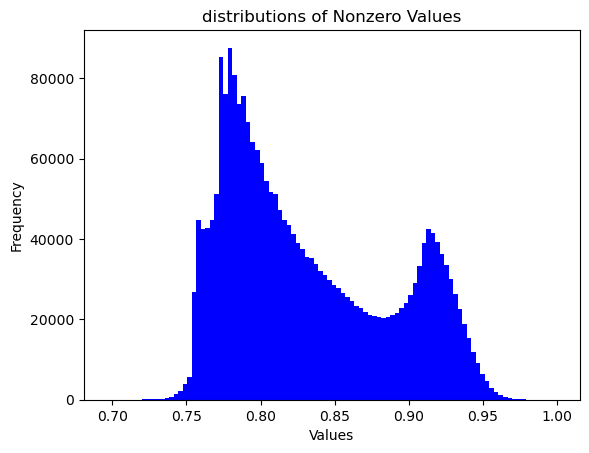

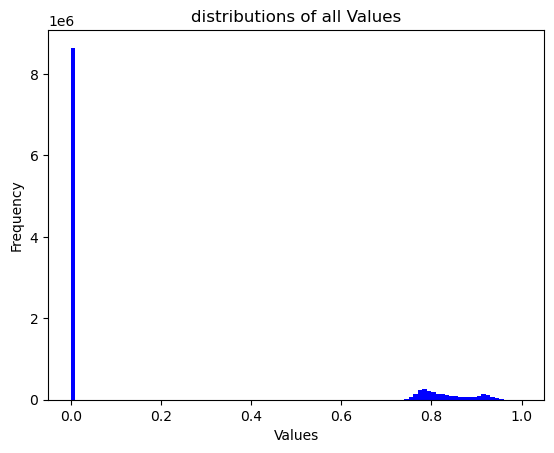

number of nonzero values = 2475374
Generated images:


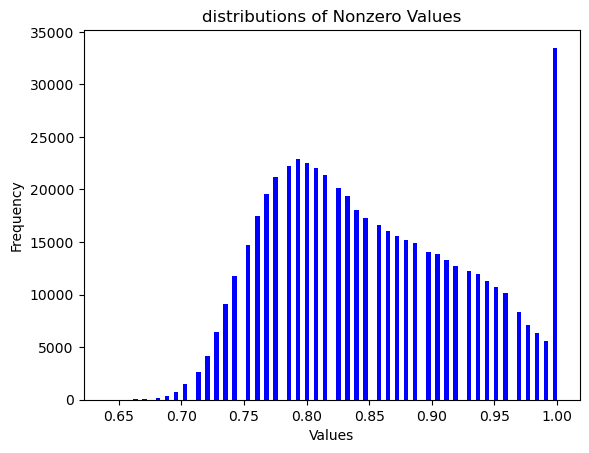

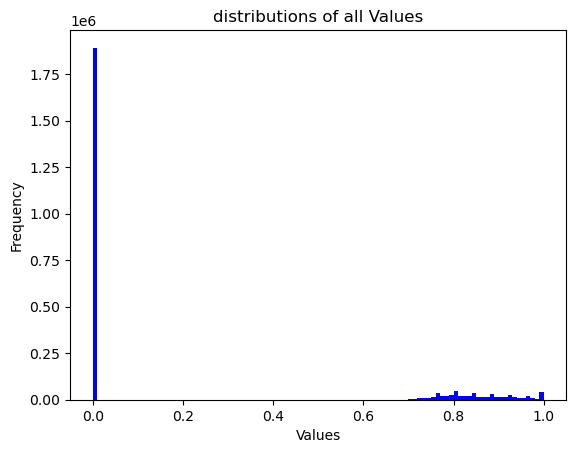

number of nonzero values = 545338


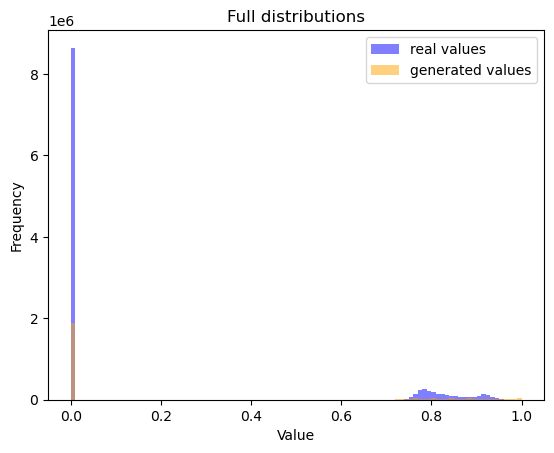

Full distribution:
KS Statistic: 0.03638778222410055
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0010:
The distributions are significantly different (reject H0), KS statistic 0.0364 > 0.0010


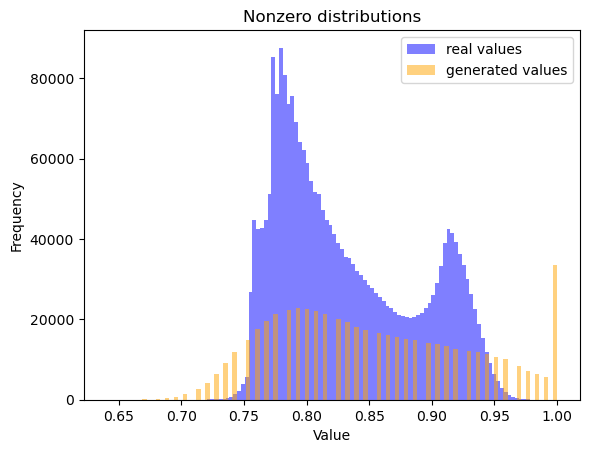

Nonzero distribution:
KS Statistic: 0.16241609345072938
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0020:
The distributions are significantly different (reject H0), KS statistic 0.1624 > 0.0020


(0.03638778222410055, 0.16241609345072938)

In [53]:
variable_consistancy_check(cosine_con, False)
avg_branch = check_branch_length(cosine_con)
ks_test(original, cosine_con, dim = 1)

In [62]:
cosine[:, 0, :, 0] = 0.0

cosine_con, cosine_incon = check_consistency(cosine)



Percentage of consistant images = 84.02%

Inconsistency reasons:
inconsistency due to zero / nonzero mistake = 11.95%
inconsistency due to distance not zero in main branch =  0.00%
inconsistency due to gap between branches =  60.08%
inconsistency due to zgap in branch 46.87%
inconsistency due to last descendant dont exist 7.13%

Number of images with two or more inconsistencies = 259, which is  16.21%
That corresponds to 2.59% of all images


Of all images, 1.91% have zero inconsistency
Of all images, 0.00% have distance main branch inconsistency
Of all images, 9.60% have gap between branches inconsistency
Of all images, 7.49% have gap within branch inconsistency
Of all images, 1.14% have last descendant inconsistency


MASS:
monotonicity threshold = -1e-06% change
number of occurences where mass is not preserved = 155791
perc of occurences where mass is not preserved = 29.12% vs. 25.77% in training data




monotonicity threshold = -0.01% change
number of occurences where mass is not preserved = 111220
perc of occurences where mass is not preserved = 20.79% vs. 11.12% in training data




monotonicity threshold = -0.05% change
number of occurences where mass is not preserved = 13333
perc of occurences where mass is not preserved = 2.49% vs. 1.71% in training data




monotonicity threshold = -0.1% change
number of occurences where mass is not preserved = 1731
perc of occurences where mass is not preserved = 0.32% vs. 0.32% in training data







DISTANCE:
total distance progentors = 337222 
number of occurences where distance increase (not preserved) = 154641
perc of occurences where mass increase (not preserved) = 45.86% vs. 49.67% in training data


total branches where the last halo distance to m

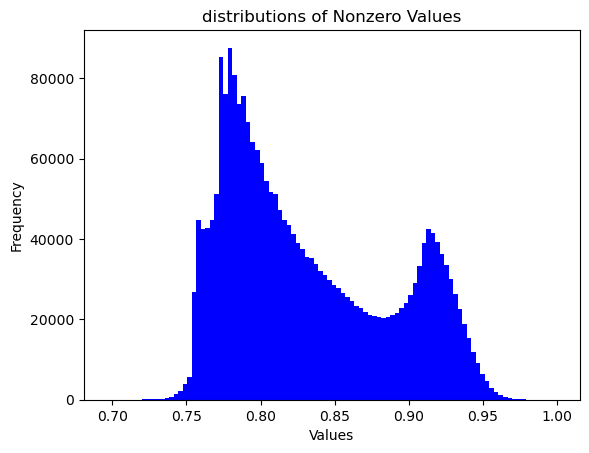

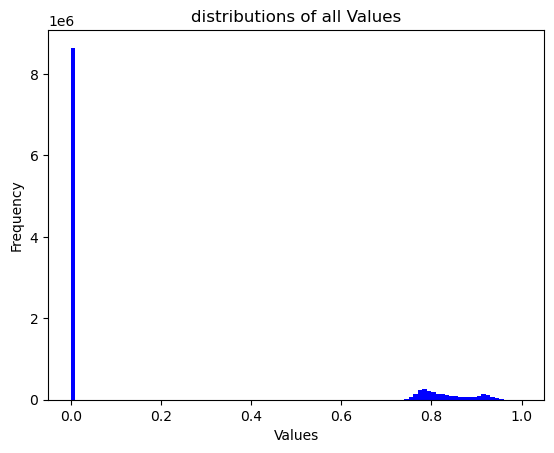

number of nonzero values = 2475374
Generated images:


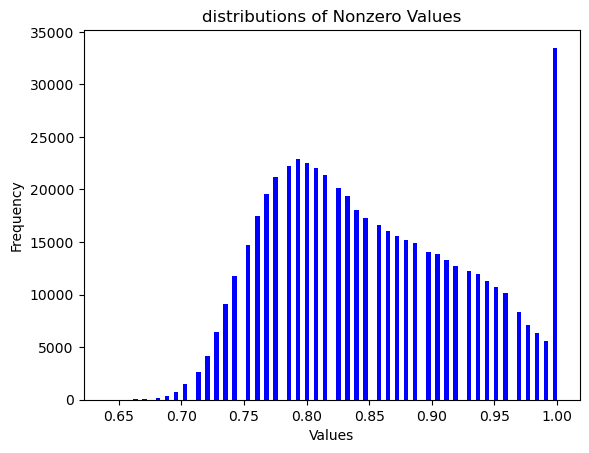

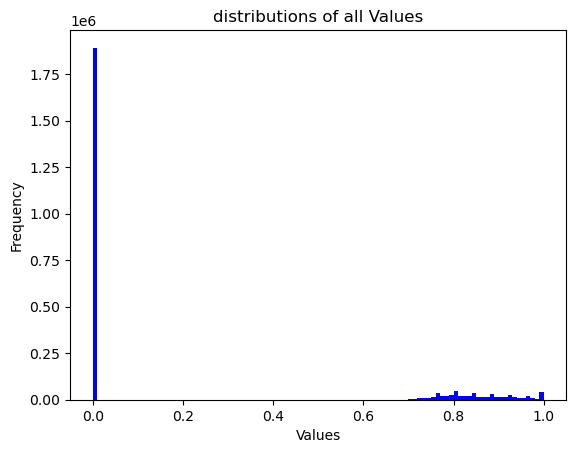

number of nonzero values = 545338


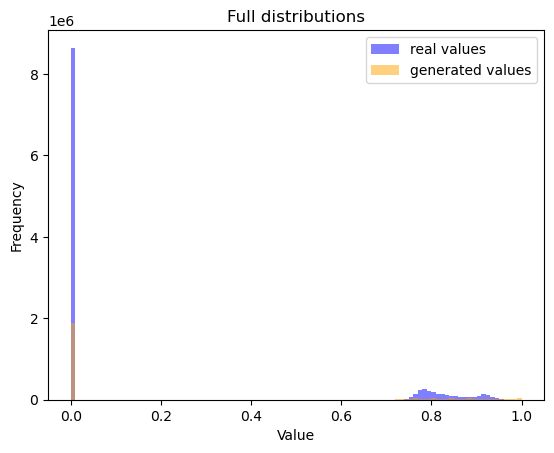

Full distribution:
KS Statistic: 0.03638778222410055
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0010:
The distributions are significantly different (reject H0), KS statistic 0.0364 > 0.0010


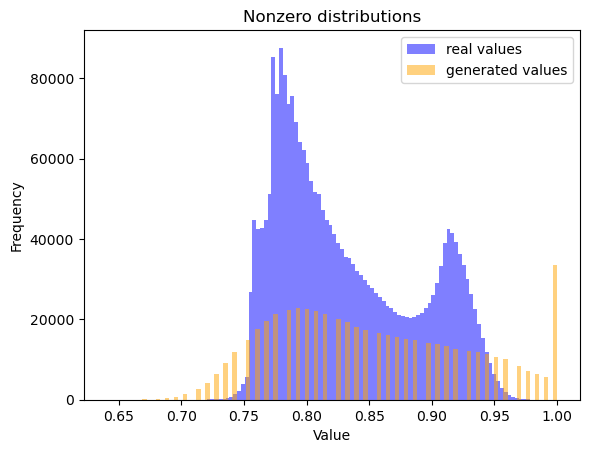

Nonzero distribution:
KS Statistic: 0.16241609345072938
P-value: 0.0

According to regular significance level of 0.05:
The distributions are significantly different (reject H0)

According to large sample significance level of 0.05, giving significance level of 0.0020:
The distributions are significantly different (reject H0), KS statistic 0.1624 > 0.0020


(0.03638778222410055, 0.16241609345072938)

In [63]:
variable_consistancy_check(cosine_con, False)
avg_branch = check_branch_length(cosine_con)
ks_test(original, cosine_con, dim = 1)